## Machine Learning using RandomForest, XGB and AdaBoost

In [1]:
# Warnings are provided to warn the developer of situations that aren’t necessarily exceptions. 
#Usually, a warning occurs when there is some obsolete of certain programming elements.
#Python program terminates immediately if an error occurs. Conversely, a warning is not critical.

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost
from xgboost import XGBRegressor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.colors as mcolors

#### Retrieving the stored components

In [3]:
# Store the DataFrame in the IPython database
%store -r df_train2
%store -r df_val2
%store -r df_test2
%store -r df_validation2

In [4]:
%store -r minmax_scaler
scaler = minmax_scaler
%store -r input_col2
%store -r target_col2

#### Splitting into x and y from input and target columns

In [5]:
# Split df_train into x_train and y_train
x_train = df_train2[input_col2]
y_train = df_train2[target_col2]

x_val = df_val2[input_col2]
y_val = df_val2[target_col2]

# Split the testing data
x_test = df_test2[input_col2]
y_test = df_test2[target_col2]

#Split the validation data
x_validation = df_validation2[input_col2]
y_validation = df_validation2[target_col2]

### Defining the different ML methods with the best hyperparameters from grid search

In [6]:
# Create RandomForestRegressor with the best hyperparameters
rf = RandomForestRegressor(max_depth=None, 
                           max_features='sqrt', 
                           min_samples_leaf=4, 
                           min_samples_split=10, 
                           n_estimators=200)

In [ ]:
# Create XGBRegressor with the best hyperparameters
xgb = XGBRegressor(colsample_bytree=0.8, 
                   learning_rate=0.1, 
                   max_depth=3, 
                   n_estimators=300, 
                   subsample=0.5)

In [ ]:
# Create AdaBoostRegressor with the best hyperparameters
ada = AdaBoostRegressor(learning_rate=0.1, 
                        loss='exponential', 
                        n_estimators=100)

### Fitting the values on the train set before predicting on validation and test set

In [7]:
rf.fit(x_train, y_train.squeeze())
ada.fit(x_train, y_train.squeeze())
xgb.fit(x_train, y_train.squeeze());

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# Create a scorer for RMSE
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

# Perform 5-fold cross-validation
scores = cross_val_score(rf, x_train, y_train.values.ravel(), cv=5, scoring=rmse_scorer)

# The scores are negative because sklearn uses a convention where higher score is better. 
# Therefore, for loss functions like RMSE where lower is better, sklearn flips the sign.
# To get the RMSE, you can just take the negative of the scores
rmse_scores = -scores

In [9]:
print(rmse_scores)
print("Mean RMSE: ", np.mean(rmse_scores))
print("Standard deviation of RMSE: ", np.std(rmse_scores))

[0.04633413 0.01504948 0.00481022 0.00533291 0.00350756]
Mean RMSE:  0.015006859039918325
Standard deviation of RMSE:  0.016193766652788856


### Predicting on the validation set, best error score and r^2 score will be used for testing

In [10]:
rf_val_preds = rf.predict(x_val)
ada_val_preds = ada.predict(x_val)
xgb_val_preds = xgb.predict(x_val)

rf_val_mse = mean_squared_error(y_val, rf_val_preds)
ada_val_mse = mean_squared_error(y_val, ada_val_preds)
xgb_val_mse = mean_squared_error(y_val, xgb_val_preds)

rf_val_rmse = np.sqrt(rf_val_mse)
ada_val_rmse = np.sqrt(ada_val_mse)
xgb_val_rmse = np.sqrt(xgb_val_mse)

rf_val_mae = mean_absolute_error(y_val, rf_val_preds)
ada_val_mae = mean_absolute_error(y_val, ada_val_preds)
xgb_val_mae = mean_absolute_error(y_val, xgb_val_preds)

rf_val_r2 = r2_score(y_val, rf_val_preds)
ada_val_r2 = r2_score(y_val, ada_val_preds)
xgb_val_r2 = r2_score(y_val, xgb_val_preds)

print("Values of MSE\n")
print("Random Forest Validation MSE: ", rf_val_mse)
print("AdaBoost Validation MSE: ", ada_val_mse)
print("XGBoost Validation MSE: ", xgb_val_mse)

print("\nValues of RMSE\n")
print("Random Forest Validation RMSE: ", rf_val_rmse)
print("AdaBoost Validation RMSE: ", ada_val_rmse)
print("XGBoost Validation RMSE: ", xgb_val_rmse)

print("\nValues of MAE\n")
print("Random Forest Validation MAE: ", rf_val_mae)
print("AdaBoost Validation MAE: ", ada_val_mae)
print("XGBoost Validation MAE: ", xgb_val_mae)

print("\nValues of R2\n")
print("Random Forest Validation R2 Score: ", rf_val_r2)
print("AdaBoost Validation R2 Score: ", ada_val_r2)
print("XGBoost Validation R2 Score: ", xgb_val_r2)

Values of MSE

Random Forest Validation MSE:  0.0023240980015442705
AdaBoost Validation MSE:  0.004331970960105029
XGBoost Validation MSE:  0.0036326467757170616

Values of RMSE

Random Forest Validation RMSE:  0.04820889960934879
AdaBoost Validation RMSE:  0.06581771007946896
XGBoost Validation RMSE:  0.06027144245591822

Values of MAE

Random Forest Validation MAE:  0.039526907319937965
AdaBoost Validation MAE:  0.05619390755975086
XGBoost Validation MAE:  0.04981935137762523

Values of R2

Random Forest Validation R2 Score:  0.775045469650383
AdaBoost Validation R2 Score:  0.580699053064418
XGBoost Validation R2 Score:  0.6483881708884487


### Test set of the Best Model (Random Forest)

In [11]:
best_model = rf  # Replace with the chosen best model
test_preds = best_model.predict(x_test)
test_mse = mean_squared_error(y_test, test_preds)
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
r2 = r2_score(y_test, test_preds)
mae = mean_absolute_error(y_test, test_preds)

print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Test MSE: 0.0012603016087187403
Test RMSE: 0.03550072687592101
Mean Absolute Error (MAE): 0.026927437276688858
R-squared (R2) Score: 0.9017501285437626


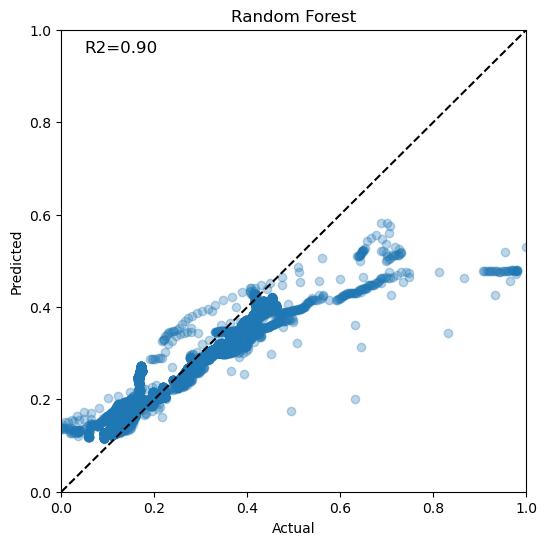

In [12]:
# Actual values
y_actual = y_test.squeeze()

# Create scatter plot for Random Forest
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot([0, 1], [0, 1], 'k--')
ax.scatter(y_actual, test_preds, alpha=0.3)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Random Forest')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Display R-squared score
ax.text(0.05, 0.95, f'R2={r2:.2f}', transform=ax.transAxes, fontsize=12)

plt.show()

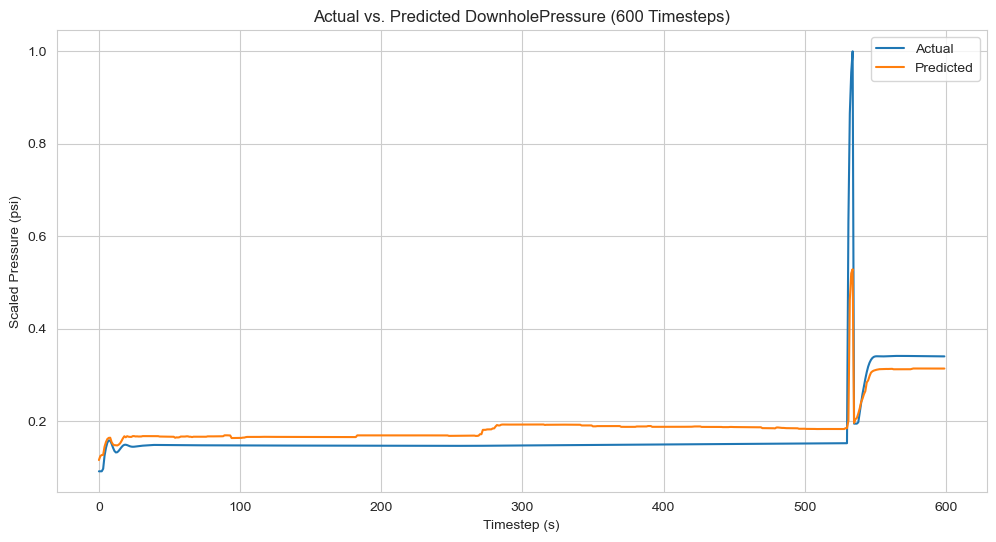

In [26]:
# Slice actual and predicted values for first 90 timesteps
y_test_first_90 = y_test[:600].values.ravel()  # Convert to 1D array
test_preds_90 = test_preds[:600]  # No need to reshape as it's already a 1D array

# Create a range for the x-axis
x_axis = range(0, 600)

# Set figure size to twice the width (e.g., (12, 6) instead of (6, 6))
plt.figure(figsize=(12, 6))

# Plot actual and predicted values for first 90 timesteps
plt.plot(x_axis, y_test_first_90, label='Actual')
plt.plot(x_axis, test_preds_90, label='Predicted')

# Add axis labels and title
plt.xlabel('Timestep (s)')
plt.ylabel('Scaled Pressure (psi)')
plt.title('Actual vs. Predicted DownholePressure (600 Timesteps)')

# Add legend
plt.legend()

# Display plot
plt.show()

### Test set of the second best model (XGB)

In [14]:
second_model = xgb  # Replace with the chosen best model
test_preds1 = second_model.predict(x_test)
test_mse1 = mean_squared_error(y_test, test_preds1)
test_rmse1 = np.sqrt(mean_squared_error(y_test, test_preds1))
r2_1 = r2_score(y_test, test_preds1)
mae1 = mean_absolute_error(y_test, test_preds1)

print("Test MSE:", test_mse1)
print("Test RMSE:", test_rmse1)
print("Mean Absolute Error (MAE):", mae1)
print("R-squared (R2) Score:", r2_1)

Test MSE: 0.001655232203059851
Test RMSE: 0.040684545014782345
Mean Absolute Error (MAE): 0.03361485272131609
R-squared (R2) Score: 0.8709623553157361


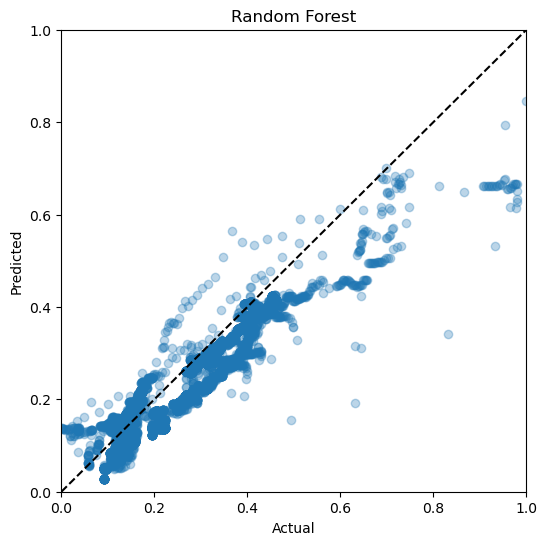

In [15]:
# Actual values
y_actual = y_test.squeeze()

# Create scatter plot for Random Forest
plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.scatter(y_actual, test_preds1, alpha=0.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

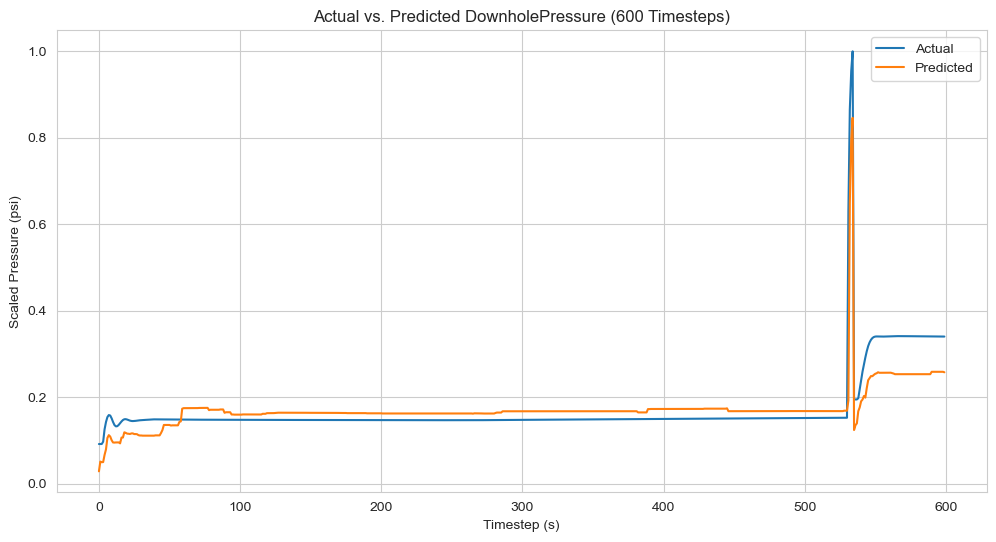

In [25]:
# Slice actual and predicted values for first 90 timesteps
y_test_first_90 = y_test[:600].values.ravel()  # Convert to 1D array
test_preds_90 = test_preds1[:600]  # No need to reshape as it's already a 1D array

# Create a range for the x-axis
x_axis = range(0, 600)

# Set figure size to twice the width (e.g., (12, 6) instead of (6, 6))
plt.figure(figsize=(12, 6))

# Plot actual and predicted values for first 90 timesteps
plt.plot(x_axis, y_test_first_90, label='Actual')
plt.plot(x_axis, test_preds_90, label='Predicted')

# Add axis labels and title
plt.xlabel('Timestep (s)')
plt.ylabel('Scaled Pressure (psi)')
plt.title('Actual vs. Predicted DownholePressure (600 Timesteps)')

# Add legend
plt.legend()

# Display plot
plt.show()

### Test set of the third best model (ADA)

In [17]:
third_model = ada  # Replace with the chosen best model
test_preds2 = third_model.predict(x_test)
test_mse2 = mean_squared_error(y_test, test_preds2)
test_rmse2 = np.sqrt(mean_squared_error(y_test, test_preds2))
r2_2 = r2_score(y_test, test_preds2)
mae2 = mean_absolute_error(y_test, test_preds2)

print("Test MSE:", test_mse2)
print("Test RMSE:", test_rmse2)
print("Mean Absolute Error (MAE):", mae2)
print("R-squared (R2) Score:", r2_2)

Test MSE: 0.0014622938348805726
Test RMSE: 0.038239950769850276
Mean Absolute Error (MAE): 0.029720165567460037
R-squared (R2) Score: 0.8860033341905165


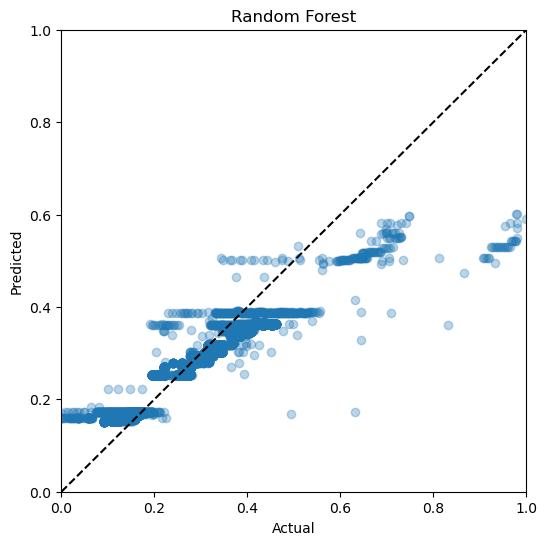

In [18]:
# Actual values
y_actual = y_test.squeeze()

# Create scatter plot for Random Forest
plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.scatter(y_actual, test_preds2, alpha=0.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

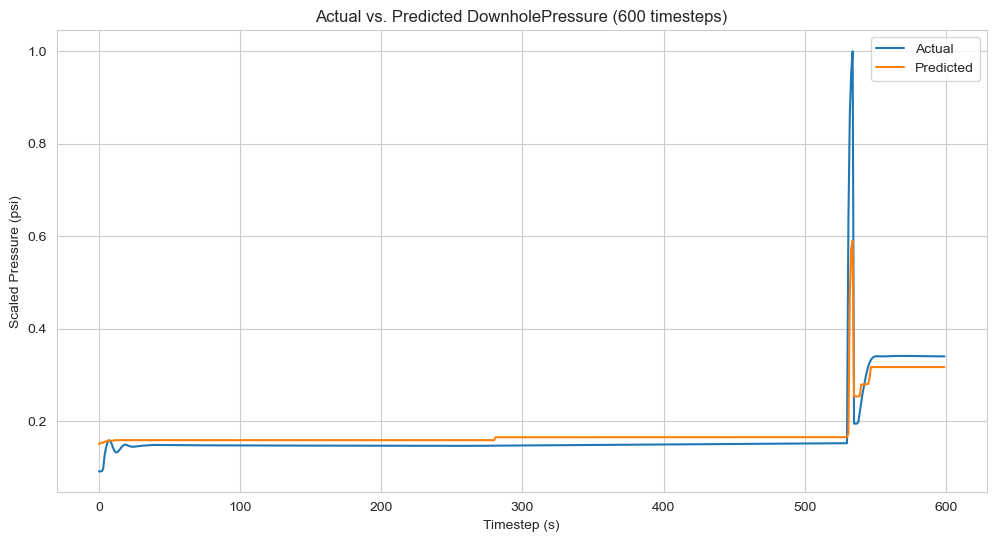

In [24]:
# Slice actual and predicted values for first 90 timesteps
y_test_first_90 = y_test[:600].values.ravel()  # Convert to 1D array
test_preds_90 = test_preds2[:600]  # No need to reshape as it's already a 1D array

# Create a range for the x-axis
x_axis = range(0, 600)

# Set figure size to twice the width (e.g., (12, 6) instead of (6, 6))
plt.figure(figsize=(12, 6))

# Plot actual and predicted values for first 90 timesteps
plt.plot(x_axis, y_test_first_90, label='Actual')
plt.plot(x_axis, test_preds_90, label='Predicted')

# Add axis labels and title
plt.xlabel('Timestep (s)')
plt.ylabel('Scaled Pressure (psi)')
plt.title('Actual vs. Predicted DownholePressure (600 timesteps)')

# Add legend
plt.legend()

# Display plot
plt.show()

### Test of best model on new online unseen data

In [20]:
y_pred_validation = rf.predict(x_validation)

test_mse = mean_squared_error(y_validation, y_pred_validation)
test_rmse = np.sqrt(mean_squared_error(y_validation, y_pred_validation))
r2 = r2_score(y_validation, y_pred_validation)
mae = mean_absolute_error(y_validation, y_pred_validation)

print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Test MSE: 0.021949254793969905
Test RMSE: 0.14815280893040775
Mean Absolute Error (MAE): 0.12118678071127796
R-squared (R2) Score: -1.8348624751342242


### Reshape and unscaling to get the actual values of the online data and the prediction

In [21]:
# Reshape the arrays to 2D arrays
y_pred_validation_2D = y_pred_validation.reshape(-1, 1)
y_validation_2D = y_validation.to_numpy().reshape(-1, 1)

# Assume target_index is the index of 'DownholePressure' in the original dataframe
target_index = 5

# Create dummy arrays for the non-target features
dummy_features_pred = np.zeros((y_pred_validation_2D.shape[0], scaler.n_features_in_))
dummy_features_val = np.zeros((y_validation_2D.shape[0], scaler.n_features_in_))

# Replace the column of the target feature with your validation data
dummy_features_pred[:, target_index] = y_pred_validation_2D.flatten()
dummy_features_val[:, target_index] = y_validation_2D.flatten()

# Invert the scaling of the predicted DownholePressure values and the actual values
y_pred_validation_inverted = scaler.inverse_transform(dummy_features_pred)[:, target_index]
y_validation_inverted = scaler.inverse_transform(dummy_features_val)[:, target_index]

### Plot of the actual vs prediction of the best model on the online data

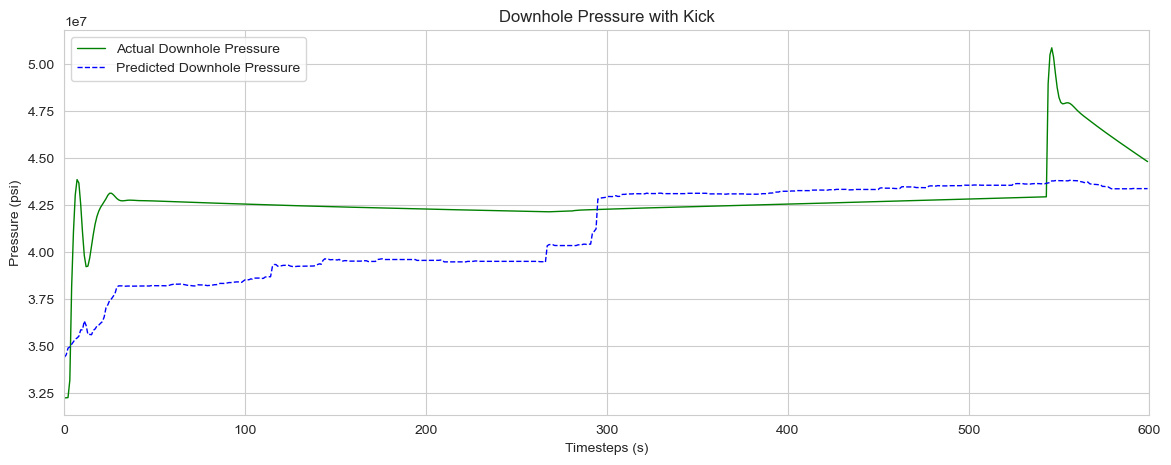

In [23]:
# Set the alpha value you want for your gridlines. 1 is opaque, 0 is transparent
alpha = 0.3

# Get the grid color
gridcolor = mpl.rcParams['grid.color']

# Convert the grid color to RGBA
rgba = mcolors.to_rgba(gridcolor)

# Create a new color with the adjusted alpha
new_color = (rgba[0], rgba[1], rgba[2], alpha)

# Convert the new color back to a hex string
new_color_hex = mcolors.to_hex(new_color)

# Set the new grid color
mpl.rcParams['grid.color'] = new_color_hex

# Set Seaborn style to 'whitegrid'
sns.set_style("whitegrid")

# Plot the two graphs
fig, ax = plt.subplots(figsize=(14,5))

# Plot the actual DownholePressure values
sns.lineplot(data=y_validation_inverted, color='green', label='Actual Downhole Pressure', linewidth=1)

# Plot the predicted DownholePressure values
sns.lineplot(data=y_pred_validation_inverted, color='blue', label='Predicted Downhole Pressure', linewidth=1, linestyle='--')

ax.set_title('Downhole Pressure with Kick')
ax.set_xlabel('Timesteps (s)')
ax.set_ylabel('Pressure (psi)')
ax.legend(loc='upper left', frameon=True)

# Zoom in on the first 600 seconds
ax.set_xlim(0, 600)

plt.show()